In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style

sns.set(style="darkgrid")

## Reading the data --Internet users by world region

In [2]:
user_df = pd.read_csv('data/internet-users-by-world-region.csv', encoding = 'latin-1')

In [3]:
user_df.shape

(165, 4)

In [4]:
user_df.head(2)

,Entity,Code,Year,Internet Users by World Region
0,East Asia & Pacific,NaN,1990,132691.59
1,East Asia & Pacific,NaN,1993,1501300.60


In [5]:
user_df = user_df.drop(columns='Code')

In [6]:
user_df.isnull().sum()

Entity                            0
Year                              0
Internet Users by World Region    0
dtype: int64

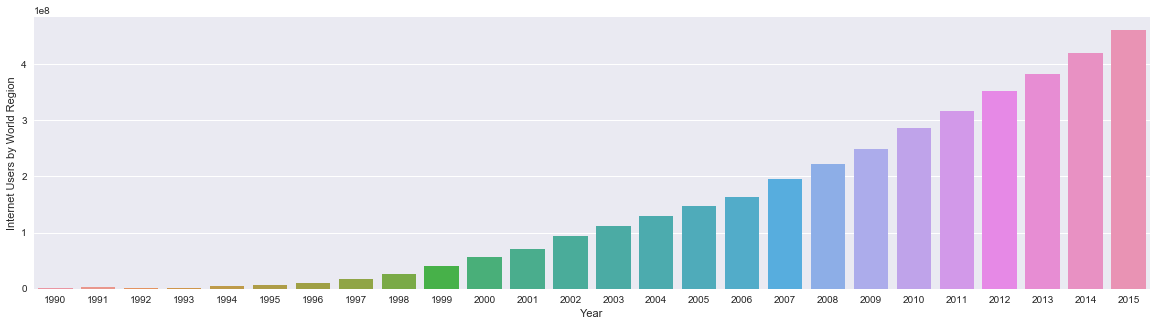

In [7]:
plt.figure(figsize=(20,5))
g = sns.barplot(x='Year',y = 'Internet Users by World Region',data = user_df, ci=None)

### Growth curve

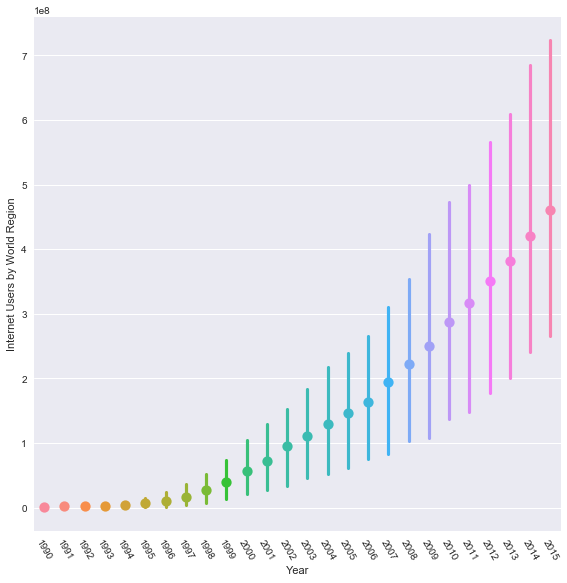

In [8]:
g = sns.factorplot(x='Year', y = 'Internet Users by World Region', data = user_df, size = 8, aspect = 1, hue='Year')
g.set_xticklabels(rotation=-60);
g.set_titles("Growth of Internet users over the years");

### Plotting out growth of users over the years based on region

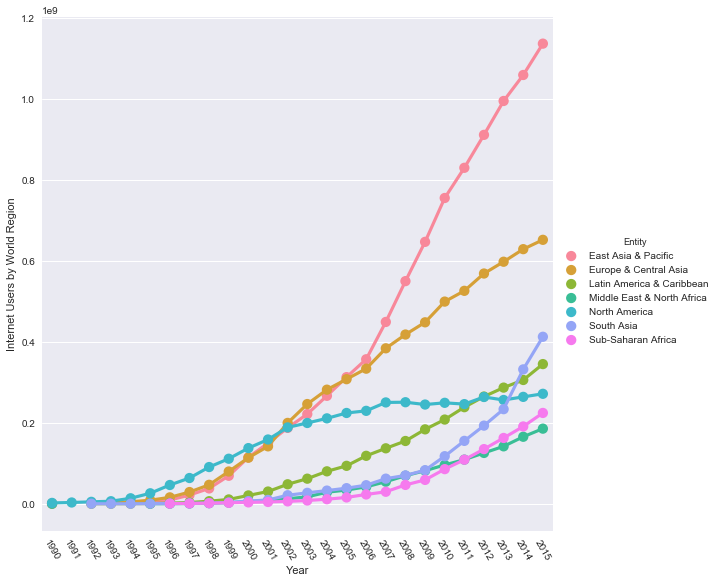

In [9]:
g = sns.factorplot(x='Year', y = 'Internet Users by World Region', data = user_df, size = 8, aspect = 1, hue='Entity')
g.set_xticklabels(rotation=-60);
g.set_titles("Growth of Internet users over the years");

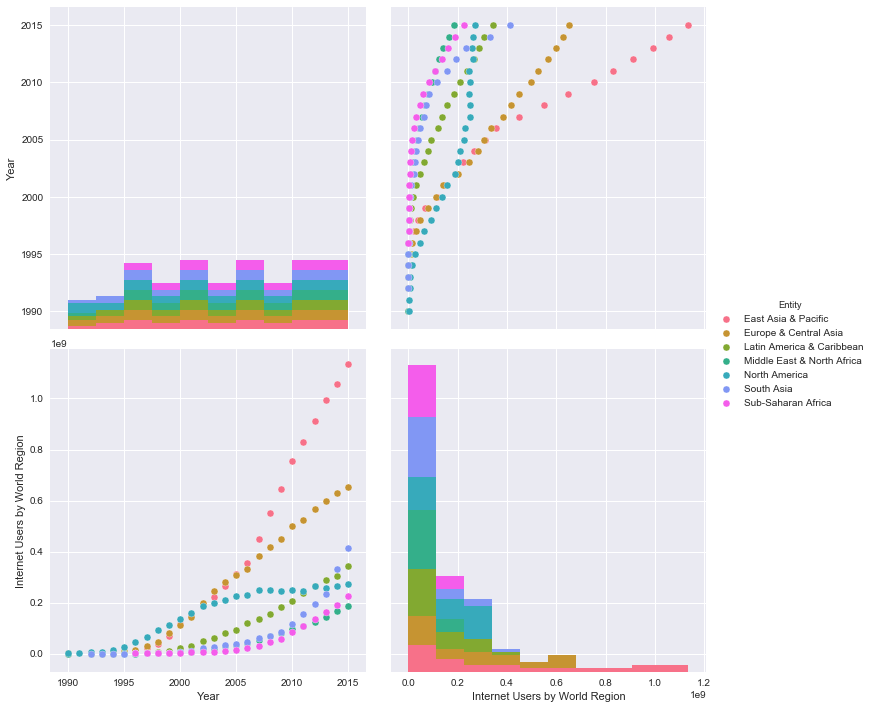

In [10]:
sns.pairplot(data = user_df, hue='Entity', size = 5);

## Interactive plots using Plotly offline

In [11]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [38]:
import plotly
import plotly.graph_objs as go
from IPython.display import display, HTML
plotly.tools.set_credentials_file(username='merishnasuwal', api_key='2cqsSwoiOhFGJzUJwQKC')

In [15]:
# color set
color_set =['#95C061', '#75ABDE', '#FE9C43','#A6886D', '#E7675D','#7C5674','#BADA55']

In [22]:
data = []
i = 0
for col in user_df['Entity'].unique():
    data.append(go.Scatter(x=user_df[user_df['Entity'] == col]['Year'], y=user_df[user_df['Entity'] == col]['Internet Users by World Region'], 
                           mode='lines+markers', line=dict(color=color_set[i], width=1, dash='line'), 
                           marker=dict(color=color_set[i], size=10), name=col))
    i += 1

In [23]:
layout = go.Layout(
    xaxis = dict(
        title = 'Year',
    ),
    yaxis = dict(
        title = 'Internet Users by World Region',
    ),
    title = "Growth of Internet Users by world region",
)

In [24]:
plotly.offline.plot(fig, filename='plots/Internet_users_plot.html') 

'file://B:\\main\\Intern_projects\\data visualization\\plots\\Internet_users_plot.html'

**Plot saved as html file in plots folder.**
<img src="plots/Internet_users_plot.png">